# Customer Segmentation Using  Principal Component Analysis

#### Import Libriaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Exploratory Data Analysis

<AxesSubplot:title={'center':'Correlation matrix of Variables (Wine dataset)'}>

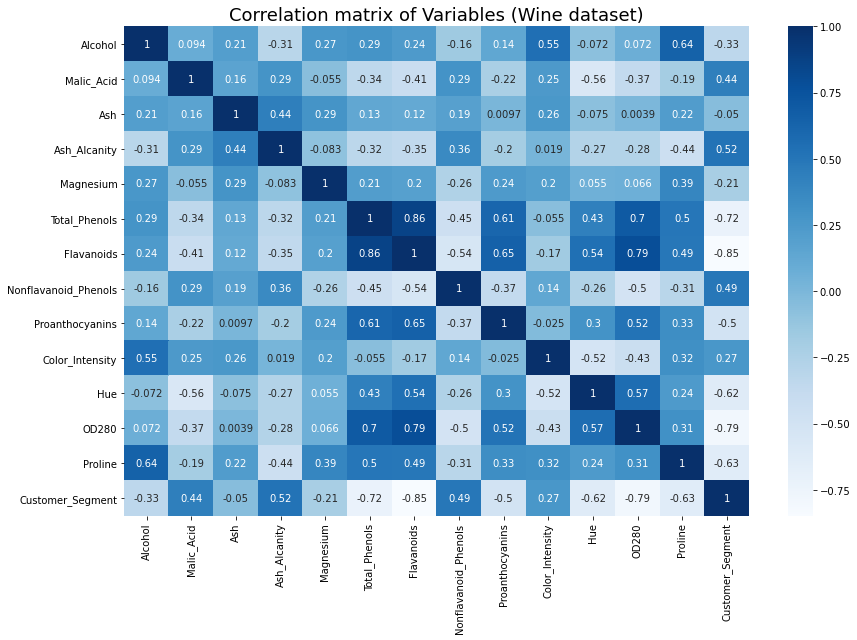

In [5]:
plt.figure(figsize=(14,9))
plt.title('Correlation matrix of Variables (Wine dataset)', fontsize=18)
sns.heatmap(df.corr(), cmap='Blues', annot=True)

Text(0, 0.5, 'Color intensity')

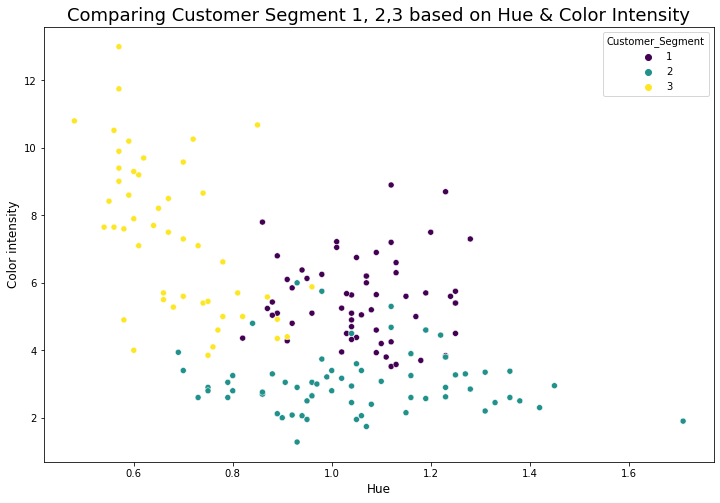

In [6]:
plt.figure(figsize=(12,8))
plt.title('Comparing Customer Segment 1, 2,3 based on Hue & Color Intensity', fontsize=18)
sns.scatterplot(x='Hue', y='Color_Intensity', data=df, hue='Customer_Segment',palette='viridis')
plt.xlabel('Hue', fontsize=12)
plt.ylabel('Color intensity', fontsize=12)

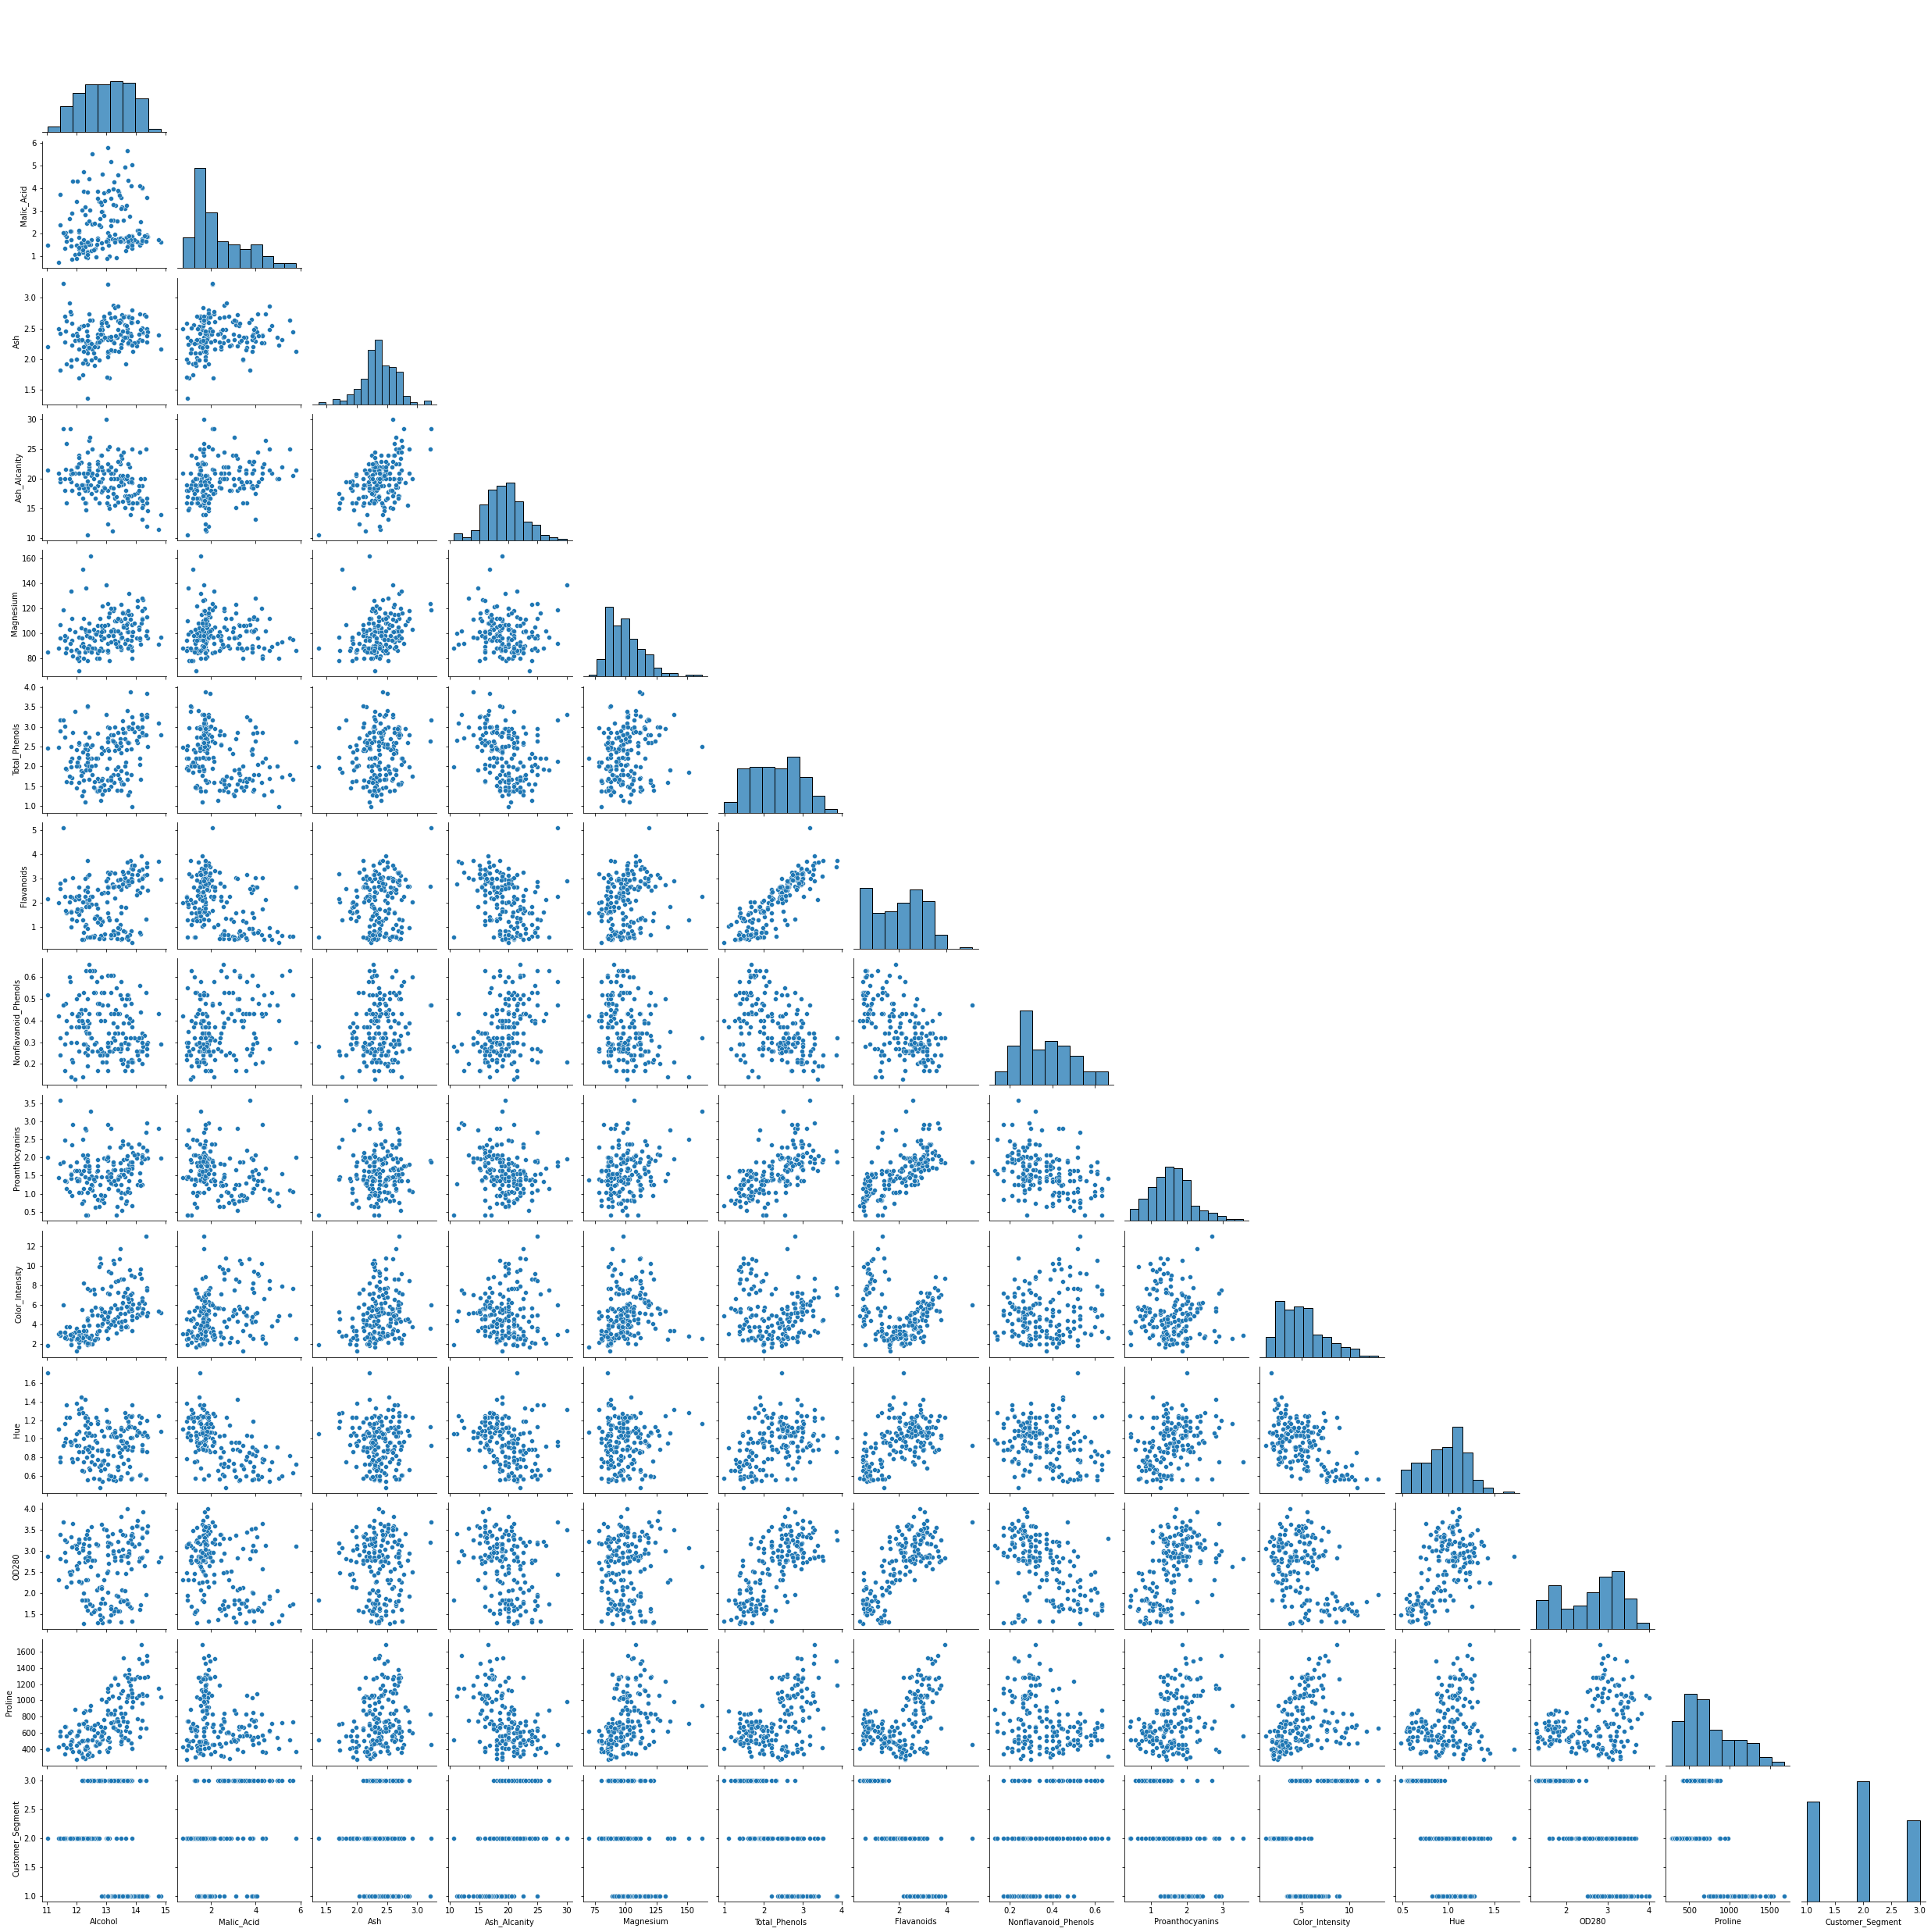

In [7]:
sns.pairplot(data=df, corner=True)

Text(0.5, 0, 'OD280/OD315 content')

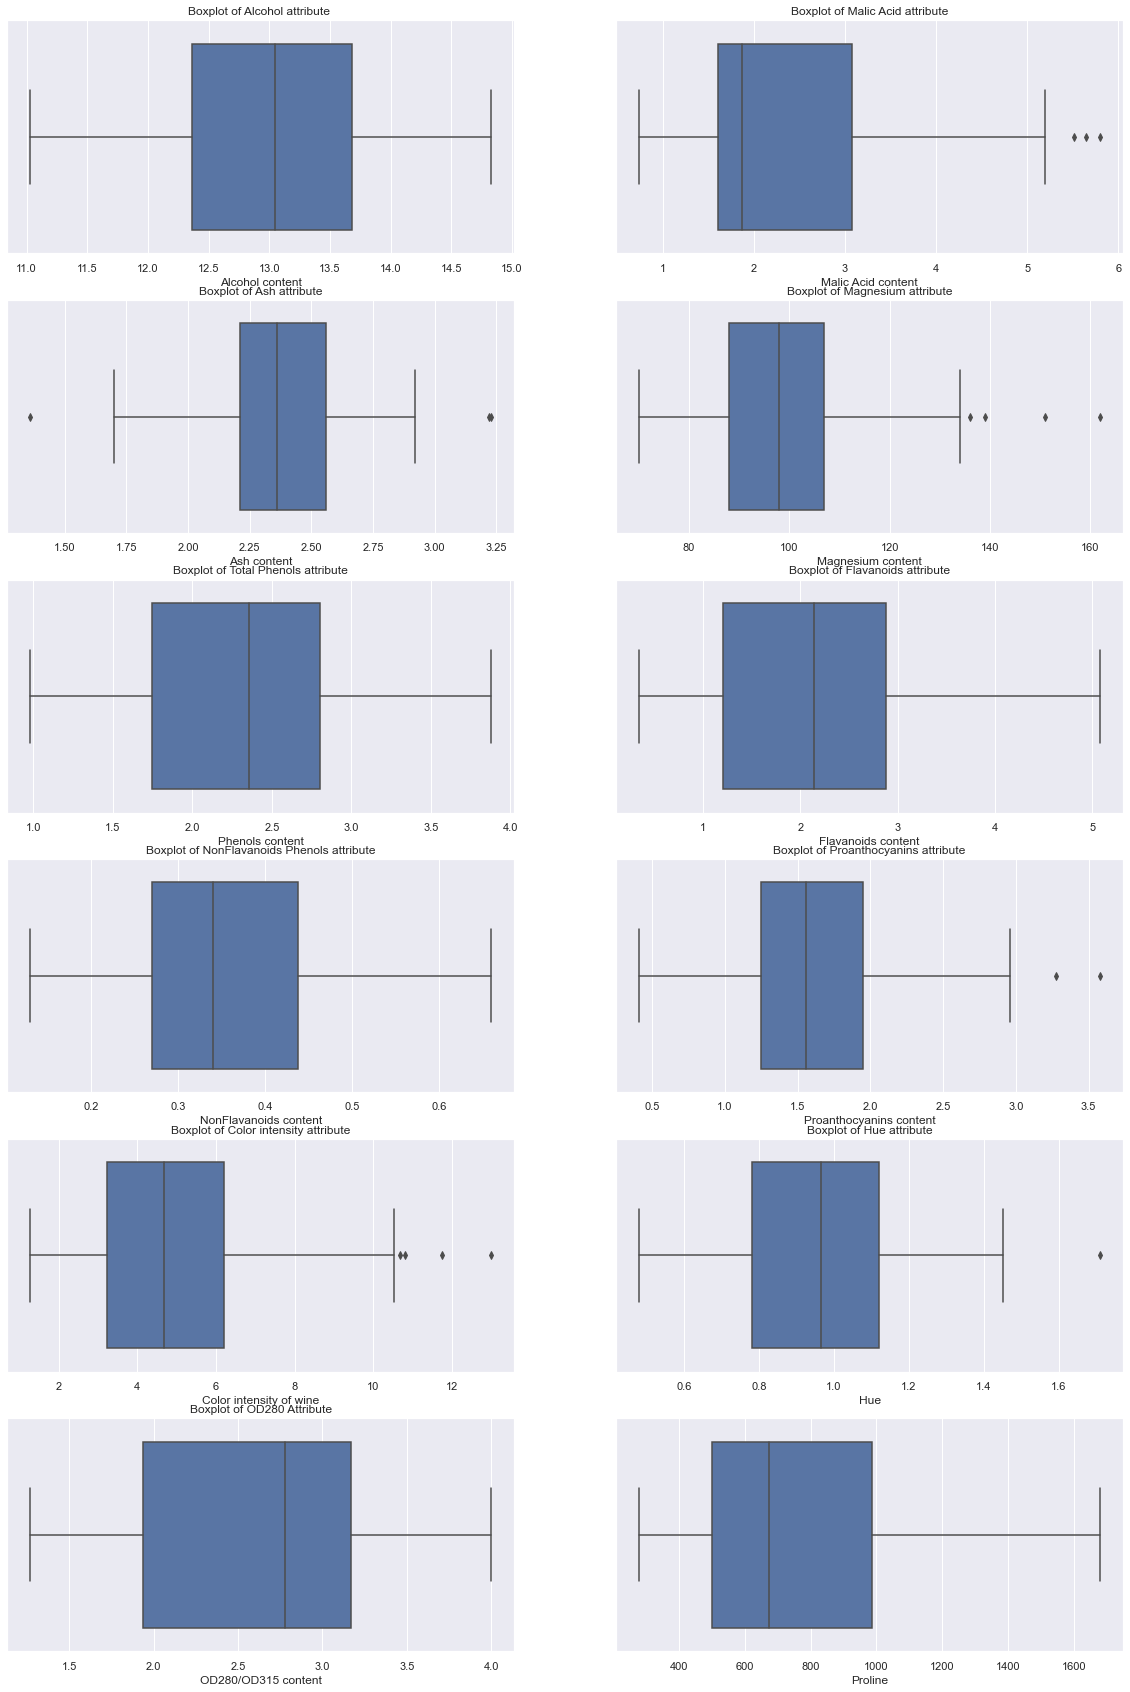

In [8]:
sns.set(font_scale=1)
f, axes = plt.subplots(6,2, figsize = (20,30))
ax1 = sns.boxplot(x='Alcohol',data=df, ax=axes[0,0])
ax2 = sns.boxplot(x='Malic_Acid',  data=df, ax=axes[0,1])
ax3 = sns.boxplot(x='Ash',  data=df, ax=axes[1,0])
ax4 = sns.boxplot(x='Magnesium',  data=df, ax=axes[1,1])
ax5 = sns.boxplot(x='Total_Phenols',  data=df, ax=axes[2,0])
ax6 = sns.boxplot(x='Flavanoids',  data=df, ax=axes[2,1])
ax7 = sns.boxplot(x='Nonflavanoid_Phenols',  data=df, ax=axes[3,0])
ax8 = sns.boxplot(x='Proanthocyanins',  data=df, ax=axes[3,1])
ax9 = sns.boxplot(x='Color_Intensity',  data=df, ax=axes[4,0])
ax10 =sns.boxplot(x='Hue',  data=df, ax=axes[4,1])
ax11 = sns.boxplot(x='OD280',  data=df, ax=axes[5,0])
ax13 = sns.boxplot(x='Proline',  data=df, ax=axes[5,1])
ax1.title.set_text('Boxplot of Alcohol attribute ')
ax1.set_xlabel('Alcohol content')
ax2.title.set_text('Boxplot of Malic Acid attribute')
ax2.set_xlabel('Malic Acid content')
ax3.title.set_text('Boxplot of Ash attribute')
ax3.set_xlabel('Ash content')
ax4.title.set_text('Boxplot of Magnesium attribute')
ax4.set_xlabel('Magnesium content')
ax5.title.set_text('Boxplot of Total Phenols attribute')
ax5.set_xlabel('Phenols content')
ax6.title.set_text('Boxplot of Flavanoids attribute')
ax6.set_xlabel('Flavanoids content')
ax7.title.set_text('Boxplot of NonFlavanoids Phenols attribute')
ax7.set_xlabel('NonFlavanoids content')
ax8.title.set_text('Boxplot of Proanthocyanins attribute')
ax8.set_xlabel('Proanthocyanins content')
ax9.title.set_text('Boxplot of Color intensity attribute')
ax9.set_xlabel('Color intensity of wine')
ax10.title.set_text('Boxplot of Hue attribute')
ax10.set_xlabel('Hue')
ax11.title.set_text('Boxplot of OD280 Attribute')
ax11.set_xlabel('OD280/OD315 content')


### Splitting Dataset into Training and Test Set

In [9]:
X = df[['Alcohol','Malic_Acid', 'Ash','Ash_Alcanity', 'Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols',
        'Proanthocyanins','Color_Intensity','Hue','OD280','Proline']].values
y = df['Customer_Segment'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Training the Logistics Regression Model on Our Training Set 

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Results

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = classifier.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
print(classification_report(y_test, y_pred))
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Classification Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Accuracy Score:
0.9722222222222222


### Visualizing Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


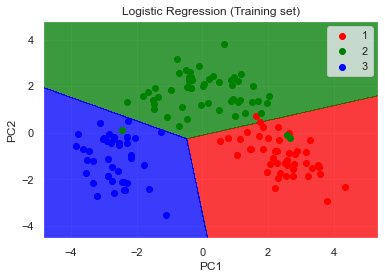

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


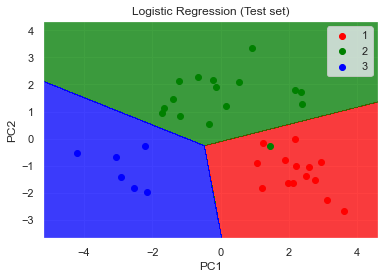

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()